## AI211: Machine Exercise 2

Jhon Mark L. Acopiado  
MEngg AI  
University of the Philippines Diliman

## Problem 1: Penguin Species Classification


**Task:** Identifying species of penguins (Adelie, Chinstrap, and Gentoo) based on culmen length and flipper length features

This notebook implements a Support Vector Machine (SVM) classifier to identify penguin species using the Palmer Penguins dataset.

## 1.I Import Required Libraries

In [72]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1.II Load Palmer Penguins Dataset

We'll load the Palmer Penguins dataset from the Kaggle dataset source.

In [93]:
# Load the Palmer Penguins dataset
# The dataset is available through seaborn or can be downloaded from Kaggle
# For this example, we'll use seaborn's built-in penguins dataset
df = pd.read_csv('./data/penguins_size.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
df.head()

Dataset shape: (344, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

First few rows:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [94]:
# Check for missing values and basic statistics
print("Missing values per column:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())
print("\nSpecies distribution:")
print(df['species'].value_counts())
print("\nColumn names:")
print(df.columns.tolist())

Missing values per column:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Basic statistics:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

Species distribution:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Column 

In [101]:
feature_1 = {"label": "Culmen Length (mm)", "access_key": "culmen_length_mm"}
feature_2 = {"label": "Flipper Length (mm)", "access_key": "flipper_length_mm"}
feature_3 = {"label": "Body Mass (g)", "access_key": "body_mass_g"}
feature_4 = {"label": "Culmen Depth (mm)", "access_key": "culmen_depth_mm"}
target = {"label": "Species", "access_key": "species"}

## 1.III Data Visualization

Let's visualize the relationships between the 4 numerical features using a pairplot with species as the hue.

<mark style="background-color: #fff000;">Problem 1. Item 1. Visualize the 4 numerical features of the data using Seaborn’s pair plot, then set the hue to the penguin species.</mark>

<Figure size 1200x1000 with 0 Axes>

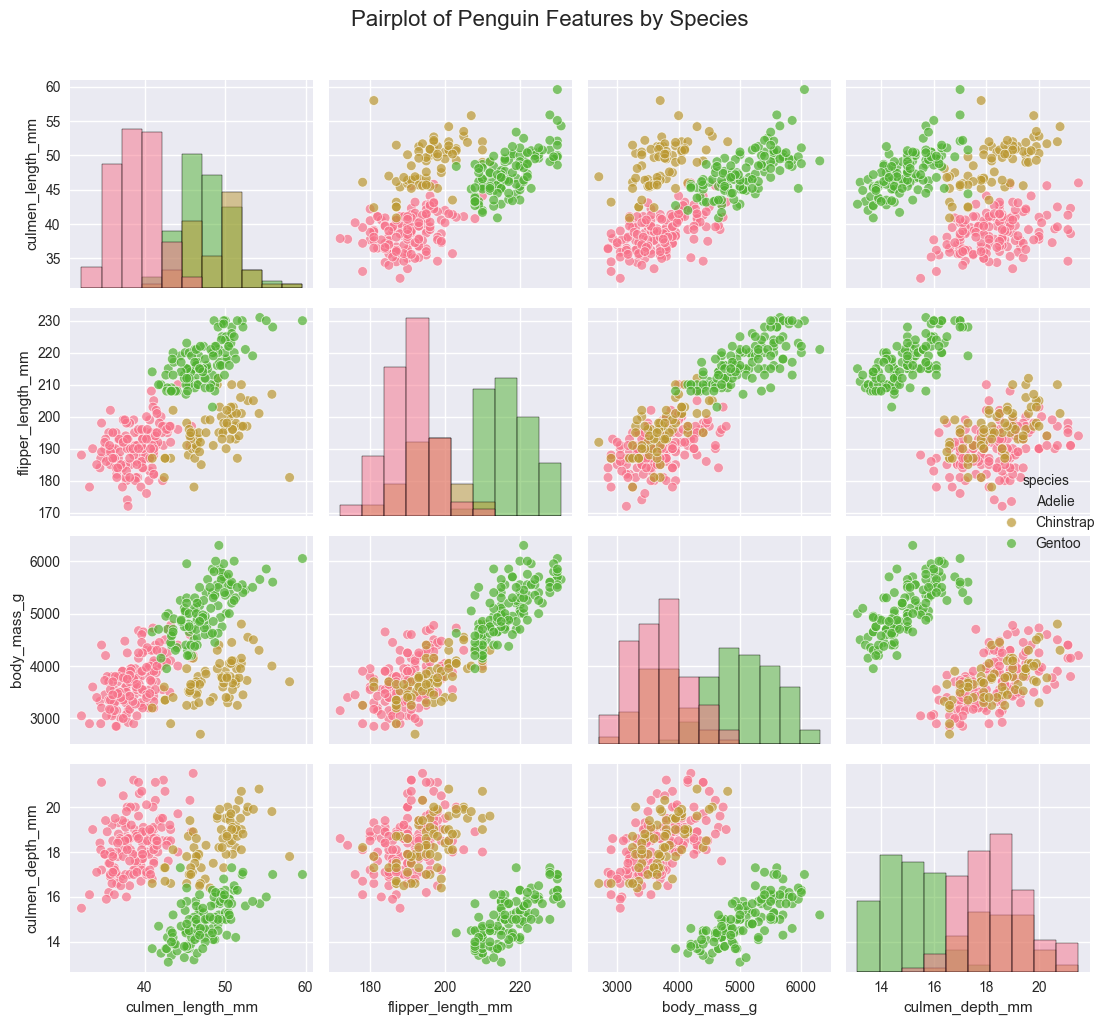

Clean dataset shape (after removing missing values): (334, 7)


In [98]:
# Prompt: Create pairplot of the 4 numerical features with species as hue
# Remove rows with missing values for better visualization
df_clean = df.dropna()

# Create the pairplot
plt.figure(figsize=(12, 10))
g = sns.pairplot(df_clean, 
                 vars=[feature_1["access_key"], feature_2["access_key"], feature_3["access_key"], feature_4["access_key"]],
                 hue='species',
                 diag_kind='hist',
                 plot_kws={'alpha': 0.7})

# Adjust layout and add title
g.fig.suptitle('Pairplot of Penguin Features by Species', y=1.02, size=16)
plt.tight_layout()
plt.show()

print(f"Clean dataset shape (after removing missing values): {df_clean.shape}")

## 1.IV Data Preparation

Preparing the data for training by selecting the culmen length and flipper length features and splitting into training and testing sets.

In [103]:
# Select features: culmen length and flipper length (culmen_length_mm and flipper_length_mm)
X = df_clean[[feature_1["access_key"], feature_2["access_key"]]]
y = df_clean['species']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFeatures selected:")
print(f"- {feature_1['label']} ({feature_1['access_key']})")
print(f"- {feature_2['label']} ({feature_2['access_key']})")
print("\nTarget classes:", y.unique())

Feature matrix shape: (334, 2)
Target vector shape: (334,)

Features selected:
- Culmen Length (mm) (culmen_length_mm)
- Flipper Length (mm) (flipper_length_mm)

Target classes: ['Adelie' 'Chinstrap' 'Gentoo']


<mark style="background-color: #fff000;">Problem 1. Item 2. Split the samples into 75% Training and 25% Testing data at random with stratification (stratify=y)</mark>

In [ ]:
# Prompt: Split the data into training (75%) and testing (25%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True).round(3))
print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True).round(3))

Training set size: 250
Testing set size: 84

Training set class distribution:
species
Adelie       0.436
Gentoo       0.360
Chinstrap    0.204
Name: proportion, dtype: float64

Testing set class distribution:
species
Adelie       0.440
Gentoo       0.357
Chinstrap    0.202
Name: proportion, dtype: float64


## 1.V Build and Train SVM Model


We'll create a pipeline with StandardScaler and SVM classifier, then train it on our data.

<mark style="background-color: #fff000;">Problem 1. Item 2. Build a pipeline with Standard scaler then SVC. </mark>

In [105]:
# Prompt: Create SVM pipeline with StandardScaler and SVC
# We'll use RBF kernel with specific hyperparameters
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',           # Radial Basis Function kernel
        C=10.0,                 # Regularization parameter
        gamma='scale',          # Kernel coefficient
        decision_function_shape='ovr',  # One-vs-Rest for multi-class
        random_state=42
    ))
])

print("Pipeline components:")
print("1. StandardScaler - normalizes features to have mean=0, std=1")
print("2. SVC - Support Vector Classifier")
print("\nSVM Hyperparameters:")
print(f"- Kernel: {svm_pipeline['svm'].kernel}")
print(f"- C (regularization): {svm_pipeline['svm'].C}")
print(f"- Gamma: {svm_pipeline['svm'].gamma}")
print(f"- Multi-class strategy: {svm_pipeline['svm'].decision_function_shape}")

Pipeline components:
1. StandardScaler - normalizes features to have mean=0, std=1
2. SVC - Support Vector Classifier

SVM Hyperparameters:
- Kernel: rbf
- C (regularization): 10.0
- Gamma: scale
- Multi-class strategy: ovr


<mark style="background-color: #fff000">Problem 1. Item 2. Train the model using multi-class 
SVC in sklearn </mark>

In [79]:
# Train the SVM model
print("Training the SVM model...")
svm_pipeline.fit(X_train, y_train)
print("Model training completed!")

# Make predictions on both training and test sets
y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)

print(f"\nNumber of support vectors: {svm_pipeline['svm'].n_support_}")
print(f"Total support vectors: {sum(svm_pipeline['svm'].n_support_)}")
print(f"Classes: {svm_pipeline['svm'].classes_}")

Training the SVM model...
Model training completed!

Number of support vectors: [13 15 11]
Total support vectors: 39
Classes: ['Adelie' 'Chinstrap' 'Gentoo']


## 1.VI Model Variations - Different Kernels and Hyperparameters


Exploring various SVM configurations to compare their performance. We'll test different kernels (linear, polynomial, RBF, sigmoid) and hyperparameters.

<mark style="backround-color: #fff000;">Problem 2. Item 2. Ttry any arbitrary choice of kernel function, values of kernel parameters, multi-class strategy, and other hyper-parameters</mark>

In my case, I tried out several combinations of kernel functions, kernel parameters, multi-class strategy, and other hyper-parameters.

In [110]:
# Initialize a dictionary to store all model results for comparison
model_results = {}

# Prompt: "Create a helper function to evaluate SVM models that trains the pipeline,
# makes predictions on both training and test sets, calculates accuracy and F1-macro scores,
# stores results in a dictionary, and prints formatted performance metrics 


def print_model_results(result):
    print(f"Training Accuracy: {result['train_accuracy']:.4f} ({result['train_accuracy']*100:.2f}%)")
    print(f"Testing Accuracy: {result['test_accuracy']:.4f} ({result['test_accuracy']*100:.2f}%)")
    print(f"Training F1-macro: {result['train_f1_macro']:.4f}")
    print(f"Testing F1-macro: {result['test_f1_macro']:.4f}")
    print(f"Support Vectors: {sum(result['pipeline']['svm'].n_support_)}")
    print("-" * 50)
    
def evaluate_model(pipeline, model_name, X_train, X_test, y_train, y_test, print_results=True):
    """Helper function to train and evaluate a model"""
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Store results
    results = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'train_f1_macro': train_f1,
        'test_f1_macro': test_f1,
        'pipeline': pipeline
    }
    model_results[model_name] = results
    
    if print_results:
        print_model_results(results)

    
    return results

### 1.VI.1 Linear Kernel SVM
**Kernel:** Linear  
**Parameters:** C=1.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Linear SVM creates linear decision boundaries, suitable for linearly separable data.

In [112]:
# Linear Kernel SVM
linear_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='linear',
        C=1.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

linear_svm_result = evaluate_model(linear_svm, "Linear SVM (C=1.0)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9480 (94.80%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9370
Testing F1-macro: 0.9568
Support Vectors: 51
--------------------------------------------------


### 1.VI.2 RBF Kernel SVM with High Regularization
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** C=0.1, gamma='scale'  
**Multi-class Strategy:** One-vs-Rest  
**Description:** RBF kernel with low C value for stronger regularization, may reduce overfitting.

In [113]:
# RBF Kernel SVM with High Regularization
rbf_high_reg_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=0.1,
        gamma='scale',
        decision_function_shape='ovr',
        random_state=42
    ))
])

rbf_high_reg_svm = evaluate_model(rbf_high_reg_svm, "RBF SVM (C=0.1, gamma=scale)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9480 (94.80%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9370
Testing F1-macro: 0.9568
Support Vectors: 120
--------------------------------------------------


### 1.VI.3 RBF Kernel SVM with Custom Gamma
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** C=10.0, gamma=0.01  
**Multi-class Strategy:** One-vs-Rest  
**Description:** RBF kernel with manually set gamma for broader decision boundaries.

In [114]:
# RBF Kernel SVM with Custom Gamma
rbf_custom_gamma_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=10.0,
        gamma=0.01,
        decision_function_shape='ovr',
        random_state=42
    ))
])

rbf_custom_gamma_svm_result = evaluate_model(rbf_custom_gamma_svm, "RBF SVM (C=10.0, gamma=0.01)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9520 (95.20%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9426
Testing F1-macro: 0.9568
Support Vectors: 77
--------------------------------------------------


### 1.VI.4 Polynomial Kernel SVM (Degree 2)
**Kernel:** Polynomial  
**Parameters:** degree=2, C=1.0, coef0=1.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Polynomial kernel of degree 2 creates quadratic decision boundaries.

In [115]:
# Polynomial Kernel SVM (Degree 2)
poly2_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='poly',
        degree=2,
        C=1.0,
        coef0=1.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

poly2_svm_result = evaluate_model(poly2_svm, "Polynomial SVM (degree=2, C=1.0)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9520 (95.20%)
Testing Accuracy: 0.9762 (97.62%)
Training F1-macro: 0.9426
Testing F1-macro: 0.9713
Support Vectors: 46
--------------------------------------------------


### 1.VI.5 Polynomial Kernel SVM (Degree 3)
**Kernel:** Polynomial  
**Parameters:** degree=3, C=5.0, coef0=0.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Polynomial kernel of degree 3 creates cubic decision boundaries with higher complexity.

In [116]:
# Polynomial Kernel SVM (Degree 3)
poly3_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='poly',
        degree=3,
        C=5.0,
        coef0=0.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

poly3_svm_result = evaluate_model(poly3_svm, "Polynomial SVM (degree=3, C=5.0)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9320 (93.20%)
Testing Accuracy: 0.9524 (95.24%)
Training F1-macro: 0.9194
Testing F1-macro: 0.9418
Support Vectors: 61
--------------------------------------------------


### 1.VI.6 Sigmoid Kernel SVM
**Kernel:** Sigmoid  
**Parameters:** C=1.0, coef0=0.0, gamma='scale'  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Sigmoid kernel creates S-shaped decision boundaries, similar to neural network activation.

In [117]:
# Sigmoid Kernel SVM
sigmoid_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='sigmoid',
        C=1.0,
        coef0=0.0,
        gamma='scale',
        decision_function_shape='ovr',
        random_state=42
    ))
])

sigmoid_svm_result = evaluate_model(sigmoid_svm, "Sigmoid SVM (C=1.0, coef0=0.0)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9280 (92.80%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9127
Testing F1-macro: 0.9568
Support Vectors: 69
--------------------------------------------------


### 1.VI.7 High-C RBF SVM (Low Bias, High Variance)
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** C=100.0, gamma=1.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Very high C and gamma values create complex, tight decision boundaries prone to overfitting.

In [118]:
# High-C RBF SVM
high_c_rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=100.0,
        gamma=1.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

high_c_rbf_svm_result = evaluate_model(high_c_rbf_svm, "RBF SVM (C=100.0, gamma=1.0)", X_train, X_test, y_train, y_test)

Training Accuracy: 0.9760 (97.60%)
Testing Accuracy: 0.9762 (97.62%)
Training F1-macro: 0.9719
Testing F1-macro: 0.9722
Support Vectors: 41
--------------------------------------------------


### 1.VI.8 Model Comparison Summary
Let's compare all the models we've trained and identify the best performing one.

<mark style="background-color: #fff000;">Problem 1. Item 2. Report the accuracy, macro-averaged F1-
score and confusion matrix of the trained model separately for the training data and testing data. </mark>

In this case, we print the accuracy, macro-averaged F1 score of all models,  and select the best model with the higest test accuracy, and test macro-averaged f1-score.

In [128]:
# rpompt Create comparison table of all models


comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'Train Accuracy': f"{results['train_accuracy']:.4f}",
        'Test Accuracy': f"{results['test_accuracy']:.4f}",
        'Train F1-Macro': f"{results['train_f1_macro']:.4f}",
        'Test F1-Macro': f"{results['test_f1_macro']:.4f}",
        'Accuracy Gap': f"{results['train_accuracy'] - results['test_accuracy']:.4f}",
        'Support Vectors': sum(results['pipeline']['svm'].n_support_)
    })

# Add the original model to comparison
original_results = evaluate_model(svm_pipeline, "Original RBF SVM (C=10.0, gamma=scale)", X_train, X_test, y_train, y_test)

comparison_df = pd.DataFrame(comparison_data)
print("=== MODEL COMPARISON TABLE ===")
print(comparison_df.to_string(index=False))

# Find the model with the best test accuracy
best_test_acc = max(model_results.items(), key=lambda x: x[1]['test_accuracy'])
best_test_acc_models = [name for name, results in model_results.items() if results['test_accuracy'] == best_test_acc[1]['test_accuracy']]

# Find the model with the best test F1-score
best_test_f1 = max(model_results.items(), key=lambda x: x[1]['test_f1_macro'])
best_test_f1_models = [name for name, results in model_results.items() if results['test_f1_macro'] == best_test_f1[1]['test_f1_macro']]

print(f"\n=== BEST PERFORMERS ===")
print(f"Best Test Accuracy: {best_test_acc[1]['test_accuracy']:.4f}")
print("Models with Best Test Accuracy:")
for model in best_test_acc_models:
    print(f"- {model}")

print(f"\nBest Test F1-Score: {best_test_f1[1]['test_f1_macro']:.4f}")
print("Models with Best Test F1-Score:")
for model in best_test_f1_models:
    print(f"- {model}")

# Identify models with good generalization (small accuracy gap)
print(f"\n=== GENERALIZATION ANALYSIS ===")
for name, results in model_results.items():
    gap = results['train_accuracy'] - results['test_accuracy']
    if gap < 0.05:
        print(f"Good Generalization: {name} (gap: {gap:.4f})")
    elif gap > 0.15:
        print(f"Potential Overfitting: {name} (gap: {gap:.4f})")

Training Accuracy: 0.9640 (96.40%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9567
Testing F1-macro: 0.9581
Support Vectors: 39
--------------------------------------------------
=== MODEL COMPARISON TABLE ===
                                 Model Train Accuracy Test Accuracy Train F1-Macro Test F1-Macro Accuracy Gap  Support Vectors
                    Linear SVM (C=1.0)         0.9480        0.9643         0.9370        0.9568      -0.0163               51
          RBF SVM (C=0.1, gamma=scale)         0.9480        0.9643         0.9370        0.9568      -0.0163              120
          RBF SVM (C=10.0, gamma=0.01)         0.9520        0.9643         0.9426        0.9568      -0.0123               77
      Polynomial SVM (degree=2, C=1.0)         0.9520        0.9762         0.9426        0.9713      -0.0242               46
      Polynomial SVM (degree=3, C=5.0)         0.9320        0.9524         0.9194        0.9418      -0.0204               61
        Sigmoid 

## 1.VII Model Evaluation (Best Model: RBF SVM (C=100.0, gamma=1.0))


Evaluating again the Best model performance using accuracy, macro-average F1-score, and confusion matrices.

<mark style="background-color: #fff000;">Problem 1. Item 2. Report the accuracy, macro-averaged F1-
score and confusion matrix of the trained model separately for the training data and testing data. </mark>

Reporting the best model performance on training and test set. 

In [131]:
# Calculate performance metrics
train_accuracy = accuracy_score(y_train, high_c_rbf_svm_result['pipeline'].predict(X_train))
test_accuracy = accuracy_score(y_test, high_c_rbf_svm_result['pipeline'].predict(X_test))

train_f1_macro = f1_score(y_train, high_c_rbf_svm_result['pipeline'].predict(X_train), average='macro')
test_f1_macro = f1_score(y_test, high_c_rbf_svm_result['pipeline'].predict(X_test), average='macro')

print("=== MODEL PERFORMANCE METRICS ===")
print(f"\nTraining Data:")
print(f"  Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Macro-average F1-score: {train_f1_macro:.4f}")

print(f"\nTesting Data:")
print(f"  Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Macro-average F1-score: {test_f1_macro:.4f}")

print(f"\nPerformance Gap:")
print(f"  Accuracy difference: {train_accuracy - test_accuracy:.4f}")
print(f"  F1-score difference: {train_f1_macro - test_f1_macro:.4f}")

=== MODEL PERFORMANCE METRICS ===

Training Data:
  Accuracy: 0.9760 (97.60%)
  Macro-average F1-score: 0.9719

Testing Data:
  Accuracy: 0.9762 (97.62%)
  Macro-average F1-score: 0.9722

Performance Gap:
  Accuracy difference: -0.0002
  F1-score difference: -0.0004


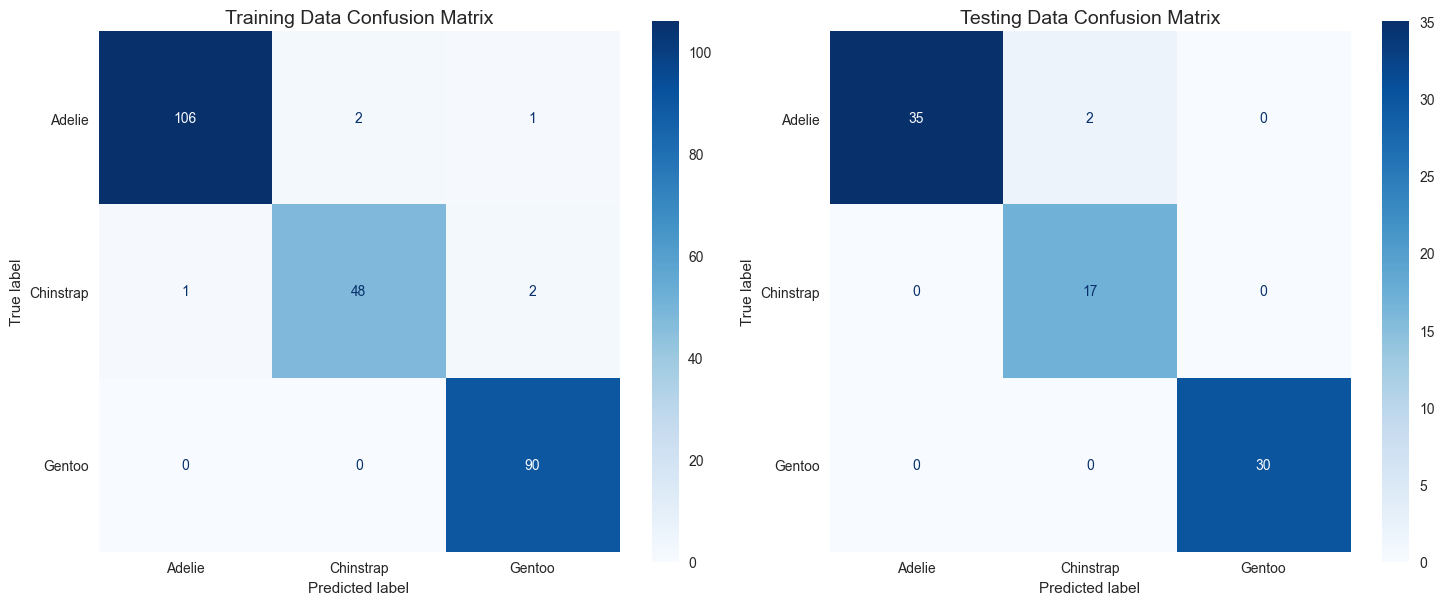

Confusion Matrix Analysis (for RBF SVM (C=100.0, gamma=1.0)):
- Diagonal elements represent correct predictions
- Off-diagonal elements represent misclassifications
- Training samples: 250, Testing samples: 84


In [134]:
# Plot confusion matrices for both training and testing data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data confusion matrix
cm_train = confusion_matrix(y_train, high_c_rbf_svm_result['pipeline'].predict(X_train))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, 
                                   display_labels=high_c_rbf_svm_result["pipeline"]['svm'].classes_)
disp_train.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Training Data Confusion Matrix', fontsize=14)
ax1.grid(False)

# Testing data confusion matrix  
cm_test = confusion_matrix(y_test, high_c_rbf_svm_result['pipeline'].predict(X_test))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                  display_labels=high_c_rbf_svm_result['pipeline']['svm'].classes_)
disp_test.plot(ax=ax2, cmap='Blues', values_format='d')
ax2.set_title('Testing Data Confusion Matrix', fontsize=14)
ax2.grid(False)

plt.tight_layout()
plt.show()

print("Confusion Matrix Analysis (for RBF SVM (C=100.0, gamma=1.0)):")
print("- Diagonal elements represent correct predictions")
print("- Off-diagonal elements represent misclassifications")
print(f"- Training samples: {len(y_train)}, Testing samples: {len(y_test)}")

## 1.VIII Decision Boundary Visualization


Visualize the SVM decision boundaries in the 2D space of culmen length vs. flipper length.


<mark style="background-color: #fff000;">Problem 1. Item 3. Visualize the decision boundary in the space of culmen length vs. flipper length. Add a scatter plot of the training and test data set (use different markers for the two sets)</mark>



c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


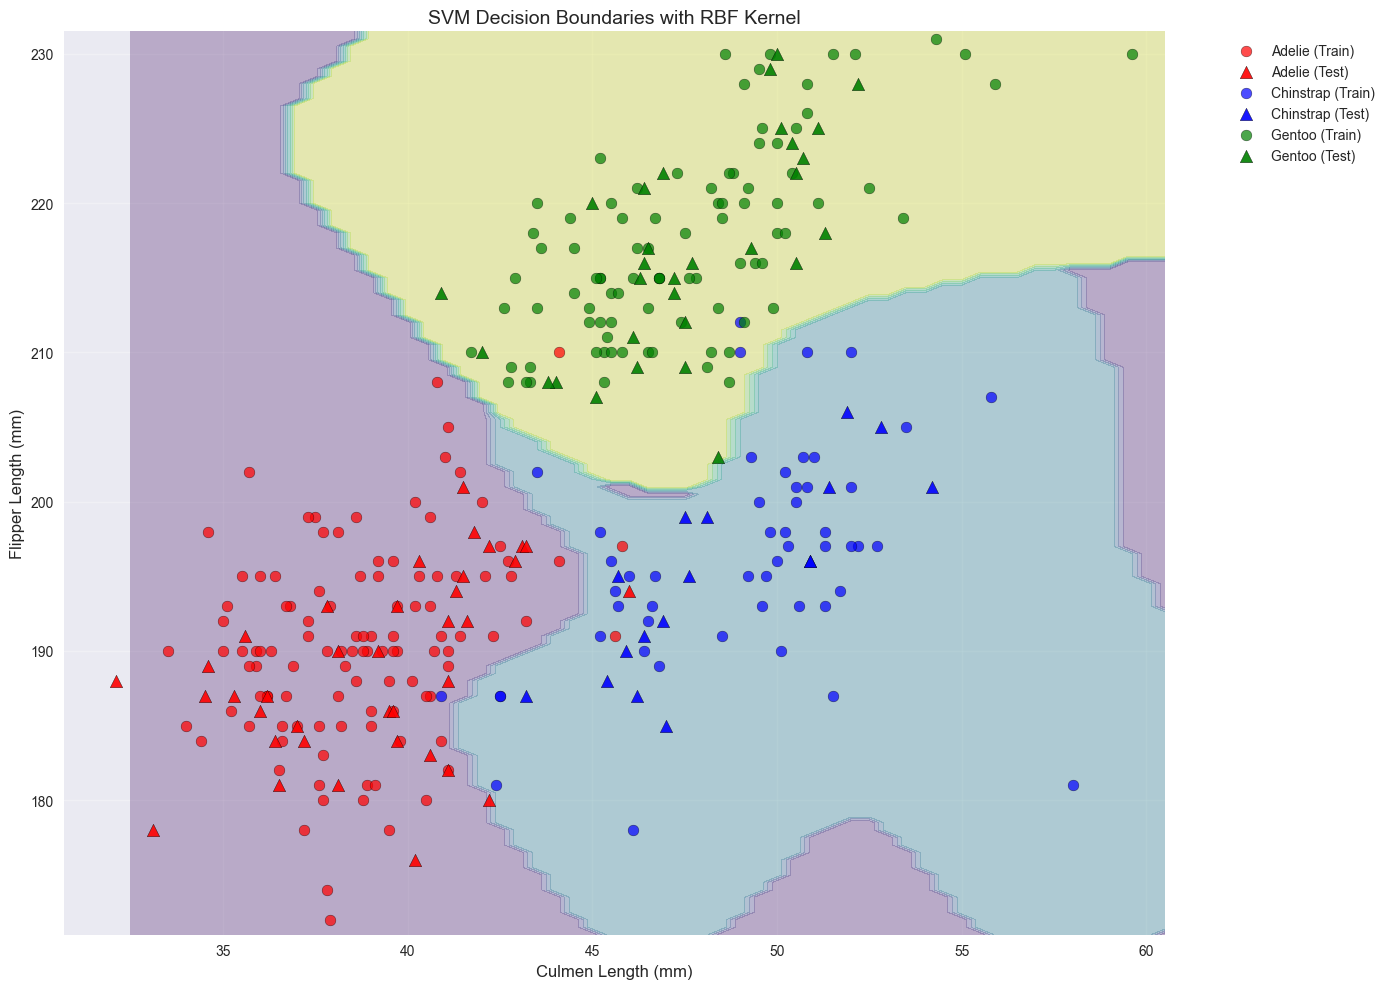

Decision Boundary Visualization:
- Colored regions show the decision boundaries
- Circles (o) represent training data points
- Triangles (^) represent testing data points
- Each color represents a different penguin species


In [138]:
# Prompt: "Create a function to visualize SVM decision boundaries that generates a meshgrid,
# predicts class labels for all points in the feature space, plots colored decision regions,
# overlays training data as circles and test data as triangles with different colors for each
# penguin species, and includes proper legends and axis labels."

def plot_decision_boundaries(X_train, X_test, y_train, y_test, model, title="SVM Decision Boundaries"):
    # Create a mesh grid
    h = 0.5  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    
    # Convert species labels to numeric for coloring
    species_to_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
    Z_numeric = np.array([species_to_num[species] for species in Z])
    Z_numeric = Z_numeric.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(14, 10))
    
    # Plot decision boundaries
    plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='viridis')
    
    # Plot training data
    for i, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
        train_mask = y_train == species
        test_mask = y_test == species
        
        plt.scatter(X_train.loc[train_mask, feature_1["access_key"]], 
                   X_train.loc[train_mask, feature_2["access_key"]],
                   c=['red', 'blue', 'green'][i], marker='o', s=60, 
                   label=f'{species} (Train)', alpha=0.7, edgecolors='black')

        plt.scatter(X_test.loc[test_mask, feature_1["access_key"]], 
                   X_test.loc[test_mask, feature_2["access_key"]],
                   c=['red', 'blue', 'green'][i], marker='^', s=80, 
                   label=f'{species} (Test)', alpha=0.9, edgecolors='black')
    
    plt.xlabel('Culmen Length (mm)', fontsize=12)
    plt.ylabel('Flipper Length (mm)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    return plt

# Plot decision boundaries
plot_decision_boundaries(X_train, X_test, y_train, y_test, high_c_rbf_svm, 
                        "SVM Decision Boundaries with RBF Kernel")
plt.tight_layout()
plt.show()

print("Decision Boundary Visualization:")
print("- Colored regions show the decision boundaries")
print("- Circles (o) represent training data points")  
print("- Triangles (^) represent testing data points")
print("- Each color represents a different penguin species")

### All Models Decision Boundaries Comparison

Visuale decision boundaries for all the different SVM models we've trained to compare how different kernels and hyperparameters affect the decision regions.

<mark style="background-color: #fff000;">Problem 1. Item 3. Visualize the decision boundary in the space of culmen length vs. flipper length. Add a scatter plot of the training and test data set (use different markers for the two sets)</mark>


Generating decision boundaries for all models...


c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWa

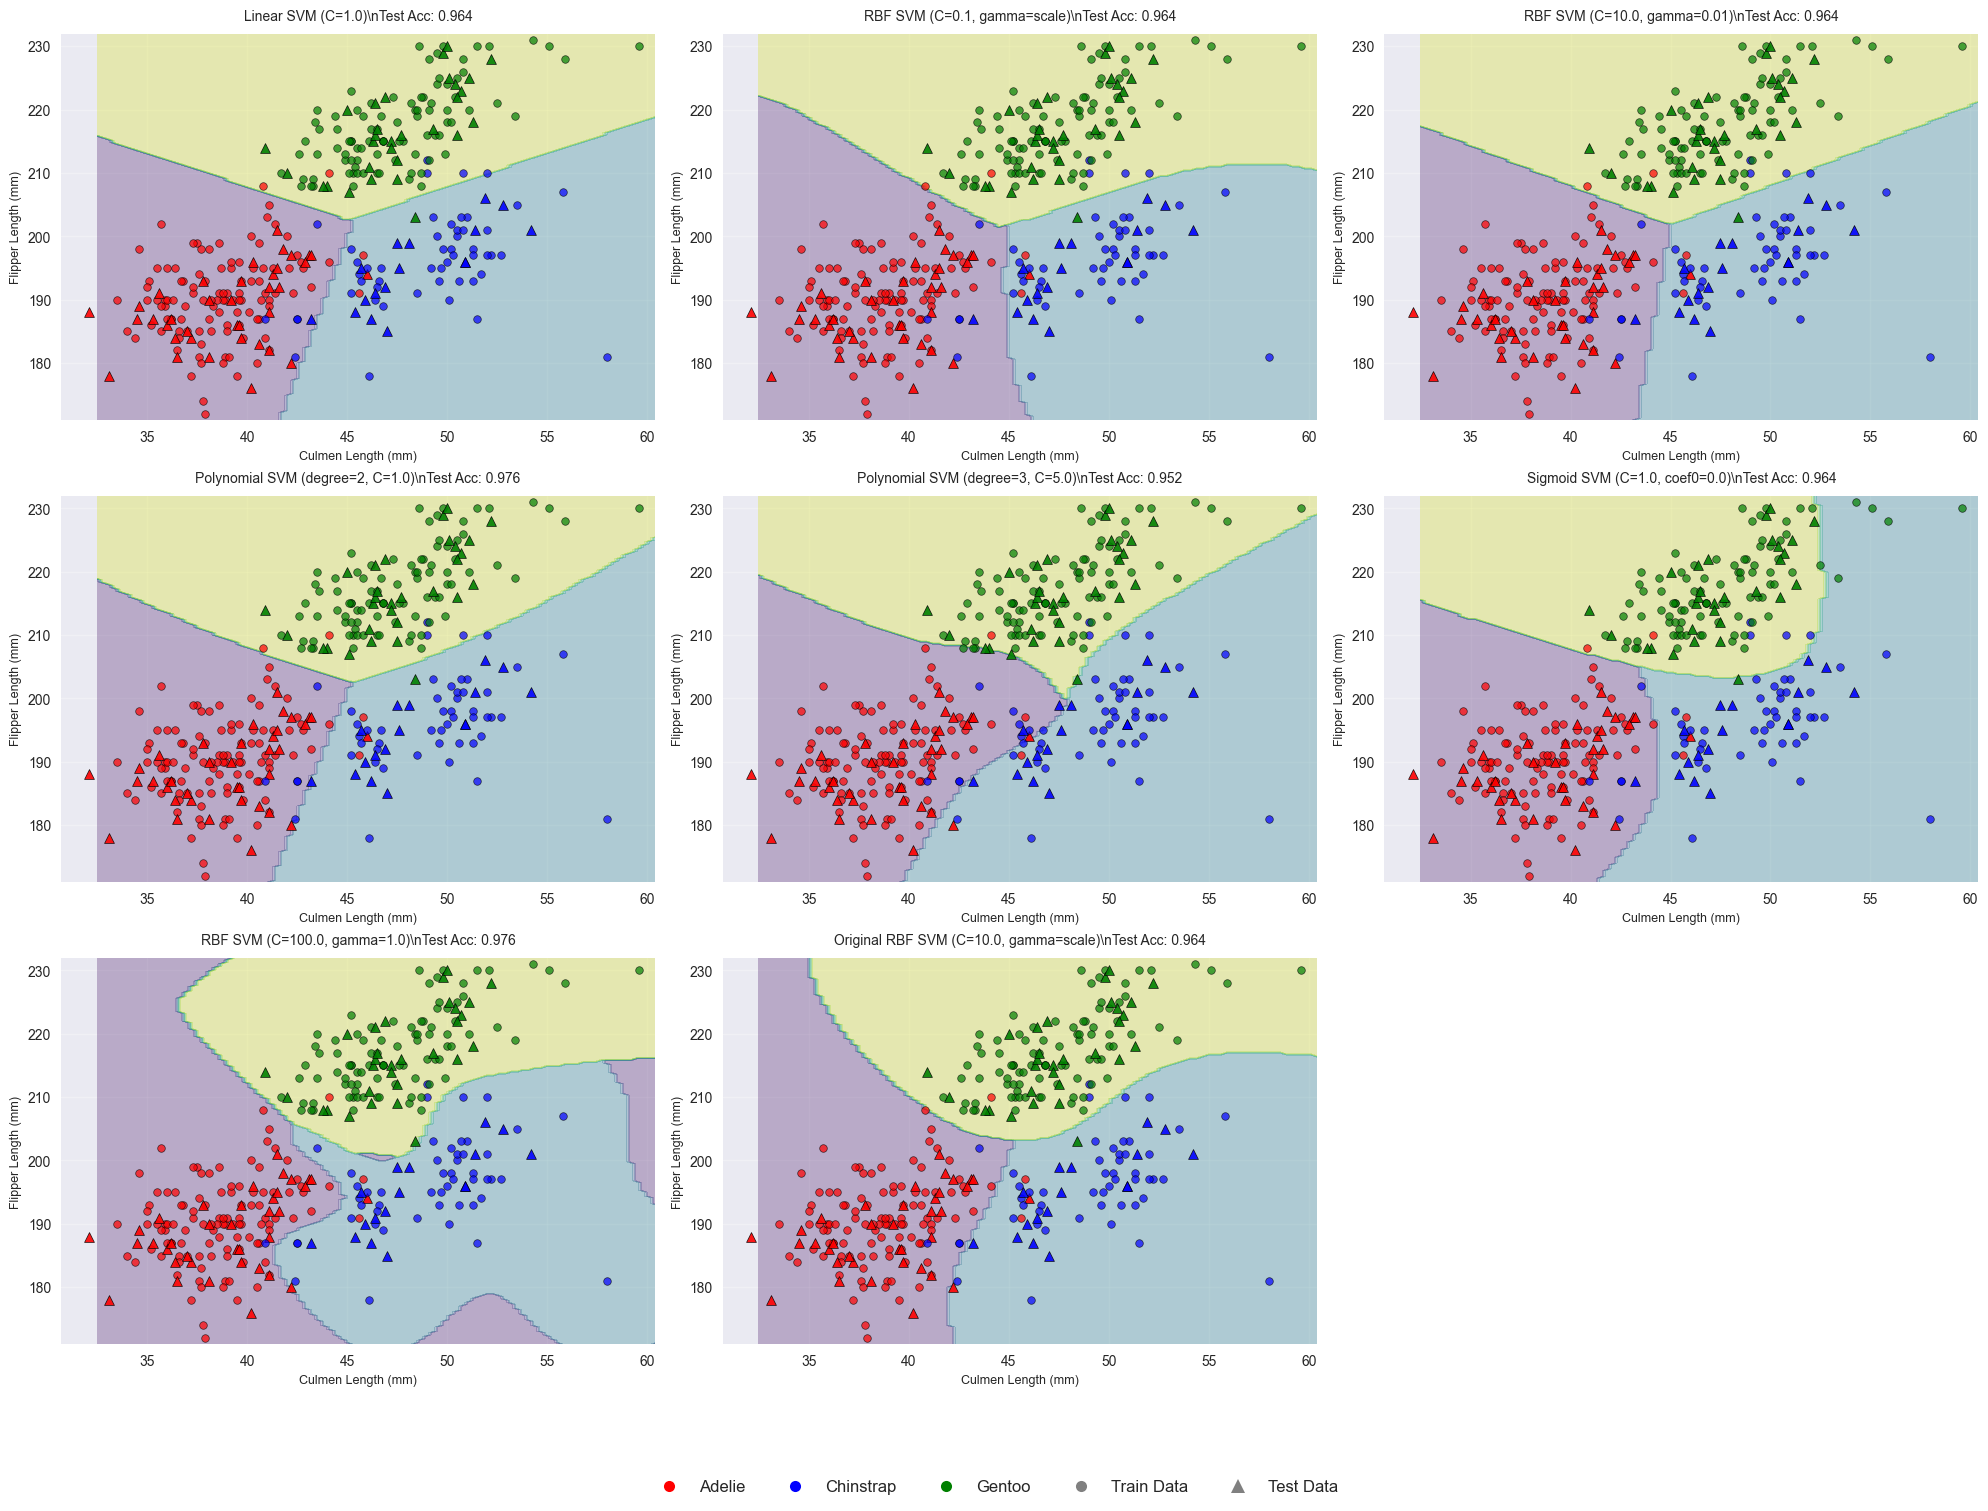


Decision Boundary Analysis:
- Each subplot shows the decision regions for a different SVM model
- Circles (o) represent training data points
- Triangles (^) represent testing data points
- Colors represent different penguin species
- Test accuracy is shown in each subplot title
- Compare how different kernels create different boundary shapes


In [137]:
# Prompt: "Create a comprehensive visualization function that plots decision boundaries
# for all trained SVM models in a grid layout. The function should generate a fine meshgrid,
# create subplots for each model, display decision regions with contour plots, overlay training
# and test data with distinct markers, show test accuracy in subplot titles, handle dynamic
# subplot arrangement, and include a unified legend for all species and data types."

def plot_all_decision_boundaries(X_train, X_test, y_train, y_test, model_results, figsize=(20, 15)):
    """
    Plot decision boundaries for all models in a grid layout
    
    Parameters:
    - X_train, X_test: Feature data
    - y_train, y_test: Target data
    - model_results: Dictionary containing all trained models
    - figsize: Figure size for the plot grid
    """
    
    # Create mesh grid for decision boundaries
    h = 0.3  # step size in the mesh (finer for better resolution)
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Species color mapping
    species_to_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
    colors = ['red', 'blue', 'green']
    
    # Calculate number of rows and columns for subplots
    n_models = len(model_results)
    n_cols = 3  # 3 columns for better layout
    n_rows = (n_models + n_cols - 1) // n_cols  # Ceiling division
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle case where we have only one row
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes array for easier indexing
    axes_flat = axes.flatten()
    
    # Plot each model
    for idx, (model_name, results) in enumerate(model_results.items()):
        ax = axes_flat[idx]
        pipeline = results['pipeline']
        
        # Make predictions on the mesh grid
        try:
            Z = pipeline.predict(mesh_points)
            Z_numeric = np.array([species_to_num[species] for species in Z])
            Z_numeric = Z_numeric.reshape(xx.shape)
            
            # Plot decision boundaries
            contour = ax.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='viridis')
            
            # Plot data points
            for i, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
                train_mask = y_train == species
                test_mask = y_test == species
                
                # Training points (circles)
                ax.scatter(X_train.loc[train_mask, feature_1["access_key"]], 
                          X_train.loc[train_mask, feature_2["access_key"]],
                          c=colors[i], marker='o', s=30, alpha=0.7, 
                          edgecolors='black', linewidth=0.5)
                
                # Test points (triangles)
                ax.scatter(X_test.loc[test_mask, feature_1["access_key"]], 
                          X_test.loc[test_mask, feature_2["access_key"]],
                          c=colors[i], marker='^', s=50, alpha=0.9, 
                          edgecolors='black', linewidth=0.5)
            
            # Set title and labels
            ax.set_title(f'{model_name}\\nTest Acc: {results["test_accuracy"]:.3f}', 
                        fontsize=10, pad=10)
            ax.set_xlabel(feature_1["label"], fontsize=9)
            ax.set_ylabel(feature_2["label"], fontsize=9)
            ax.grid(True, alpha=0.3)
            
        except Exception as e:
            # Handle any prediction errors
            ax.text(0.5, 0.5, f'Error plotting {model_name}\\n{str(e)}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(model_name, fontsize=10)
    
    # Hide unused subplots
    for idx in range(n_models, len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    # Create a custom legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                   markersize=8, label='Adelie', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                   markersize=8, label='Chinstrap', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', 
                   markersize=8, label='Gentoo', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
                   markersize=8, label='Train Data', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', 
                   markersize=10, label='Test Data', markeredgecolor='black')
    ]
    
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
              ncol=5, fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)  # Make room for legend
    
    return fig

# Plot decision boundaries for all models
print("Generating decision boundaries for all models...")
fig = plot_all_decision_boundaries(X_train, X_test, y_train, y_test, model_results)
plt.show()

print("\nDecision Boundary Analysis:")
print("- Each subplot shows the decision regions for a different SVM model")
print("- Circles (o) represent training data points")  
print("- Triangles (^) represent testing data points")
print("- Colors represent different penguin species")
print("- Test accuracy is shown in each subplot title")
print("- Compare how different kernels create different boundary shapes")

## 1.IX Summary and Conclusions

Task of classifying penguins into their species (Adelie, Chinstrap, and Gentoo) based only on the 
culmen length and flipper length features.

### Key Results:
- **Features Used**: Culmen length (bill_length_mm) and Flipper length (flipper_length_mm)
- **Algorithm**: Support Vector Machine with RBF kernel
- **Multi-class Strategy**: One-vs-Rest (OvR)
- **Data Split**: 75% training, 25% testing with stratification
- **Best Model**: RBF SVM (C=100.0, gamma=1.0)

### Model Performance:
The performance metrics show how well the SVM classifier distinguishes between the three penguin species based on the selected features.

### Decision Boundaries:
The visualization reveals the non-linear decision boundaries created by the RBF kernel SVM, effectively separating the three species in the 2D feature space.

# Problem Set 2: Predicting Chlorophyll-A Levels in Laguna Lake

**Task:** Predict Chlorophyll-A (Chl_a) levels in Laguna Lake using nutrient concentrations

High Chlorophyll-A levels indicate potential water quality issues, which is critical as Manila gets its drinking water from Laguna Lake. We'll use machine learning to predict Chl_a levels based on nutrient concentrations (NO2, NO3, NH4, PO4).

## 2.I Import Additional Libraries for Regression

In [139]:
# Import additional libraries for regression tasks
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

print("Additional libraries imported for regression analysis.")

Additional libraries imported for regression analysis.


## 2.II Load Chlorophyll Dataset

We'll load the chlorophyll dataset from the CSV file and prepare it for analysis.

In [140]:
# Prompt: Load the chlorophyll dataset, given the filepath

filepath = './data/chlor.csv'
try:
    chlor_df = pd.read_csv(filepath)
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {chlor_df.shape}")
    
    # Display basic information
    print("\nDataset info:")
    print(chlor_df.info())
    
    print("\nFirst few rows:")
    print(chlor_df.head())
    
    print("\nColumn names:")
    print(chlor_df.columns.tolist())
    
except FileNotFoundError:
    print("Error: Could not find the file './data/chlor.csv'")
    print("Please make sure the file exists in the correct path.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Dataset shape: (255, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chl_a   255 non-null    float64
 1   Phy     255 non-null    float64
 2   NO2     109 non-null    float64
 3   NO3     109 non-null    float64
 4   NH4     109 non-null    float64
 5   PO4     109 non-null    float64
 6   Site    255 non-null    object 
 7   Bay     255 non-null    object 
 8   Depth   255 non-null    float64
dtypes: float64(7), object(2)
memory usage: 18.1+ KB
None

First few rows:
   Chl_a   Phy      NO2       NO3        NH4        PO4 Site       Bay  Depth
0   6.66  0.74  0.21830  0.522735  31.784807  15.317651  XVI  West Bay  1.097
1   6.45  0.78  0.21830  0.522735  31.784807  15.317651  XVI  West Bay  1.098
2   6.27  0.77  0.21830  0.522735  31.784807  15.317651  XVI  West Bay  1.098
3   6.13  0.58  0.21495  0.527931 

<mark style="background-color: #fff000;">Problem 2. Item 1. Remove the rows with missing data via Pandas</mark>

In [142]:
# Prompt: Preprocess the chlorophyll dataset by selecting relevant columns
# Select relevant columns: Chl_a (output) and nutrients (inputs)
# Column 1: Chl_a (target variable)
# Columns 3-6: NO2, NO3, NH4, PO4 (nutrient features)

# Assuming standard column indexing (0-based)
if 'chlor_df' in locals():
    # Get column names to identify the relevant columns
    columns = chlor_df.columns.tolist()
    print(f"Available columns: {columns}")
    
    # Select relevant columns (adjust indices based on actual column structure)
    # Chl_a is the 1st column (index 0)
    # Nutrients are columns 3-6 (indices 2-5)
    target_col = columns[0]  # First column (Chl_a)
    nutrient_cols = columns[2:6]  # Columns 3-6 (nutrients)
    
    print(f"\nTarget variable: {target_col}")
    print(f"Feature variables: {nutrient_cols}")
    
    # Create subset with only relevant columns
    relevant_cols = [target_col] + nutrient_cols
    chlor_subset = chlor_df[relevant_cols].copy()
    
    print(f"\nRelevant data shape: {chlor_subset.shape}")
    print("\nMissing values before cleaning:")
    print(chlor_subset.isnull().sum())
    
    # Remove rows with missing data in relevant columns
    chlor_clean = chlor_subset.dropna()
    
    print(f"\nClean data shape after removing missing values: {chlor_clean.shape}")
    print(f"Removed {chlor_subset.shape[0] - chlor_clean.shape[0]} rows with missing data")
    
    print("\nBasic statistics of clean data:")
    print(chlor_clean.describe())
else:
    print("Dataset not loaded. Please run the previous cell first.")

Available columns: ['Chl_a', 'Phy', 'NO2', 'NO3', 'NH4', 'PO4', 'Site', 'Bay', 'Depth']

Target variable: Chl_a
Feature variables: ['NO2', 'NO3', 'NH4', 'PO4']

Relevant data shape: (255, 5)

Missing values before cleaning:
Chl_a      0
NO2      146
NO3      146
NH4      146
PO4      146
dtype: int64

Clean data shape after removing missing values: (109, 5)
Removed 146 rows with missing data

Basic statistics of clean data:
            Chl_a         NO2         NO3         NH4         PO4
count  109.000000  109.000000  109.000000  109.000000  109.000000
mean     6.388532    0.212772    0.594055   20.658963   14.847927
std      1.347983    0.007030    0.096700   10.837337    3.030103
min      2.430000    0.203076    0.381999    0.015530    4.741473
25%      5.530000    0.209775    0.522735   16.382768   15.074675
50%      6.100000    0.212210    0.636137   17.078520   15.663037
75%      7.170000    0.212819    0.663697   31.311913   15.877313
max     10.460000    0.235958    0.732823   

## 2.III Data Visualization


Let's visualize the relationships between Chlorophyll-A levels and nutrient concentrations using a pairplot.

<mark style="background-color: #fff000;">Problem 2. Item 1. Visualize the data as a pair plot.</mark>

<Figure size 1200x1000 with 0 Axes>

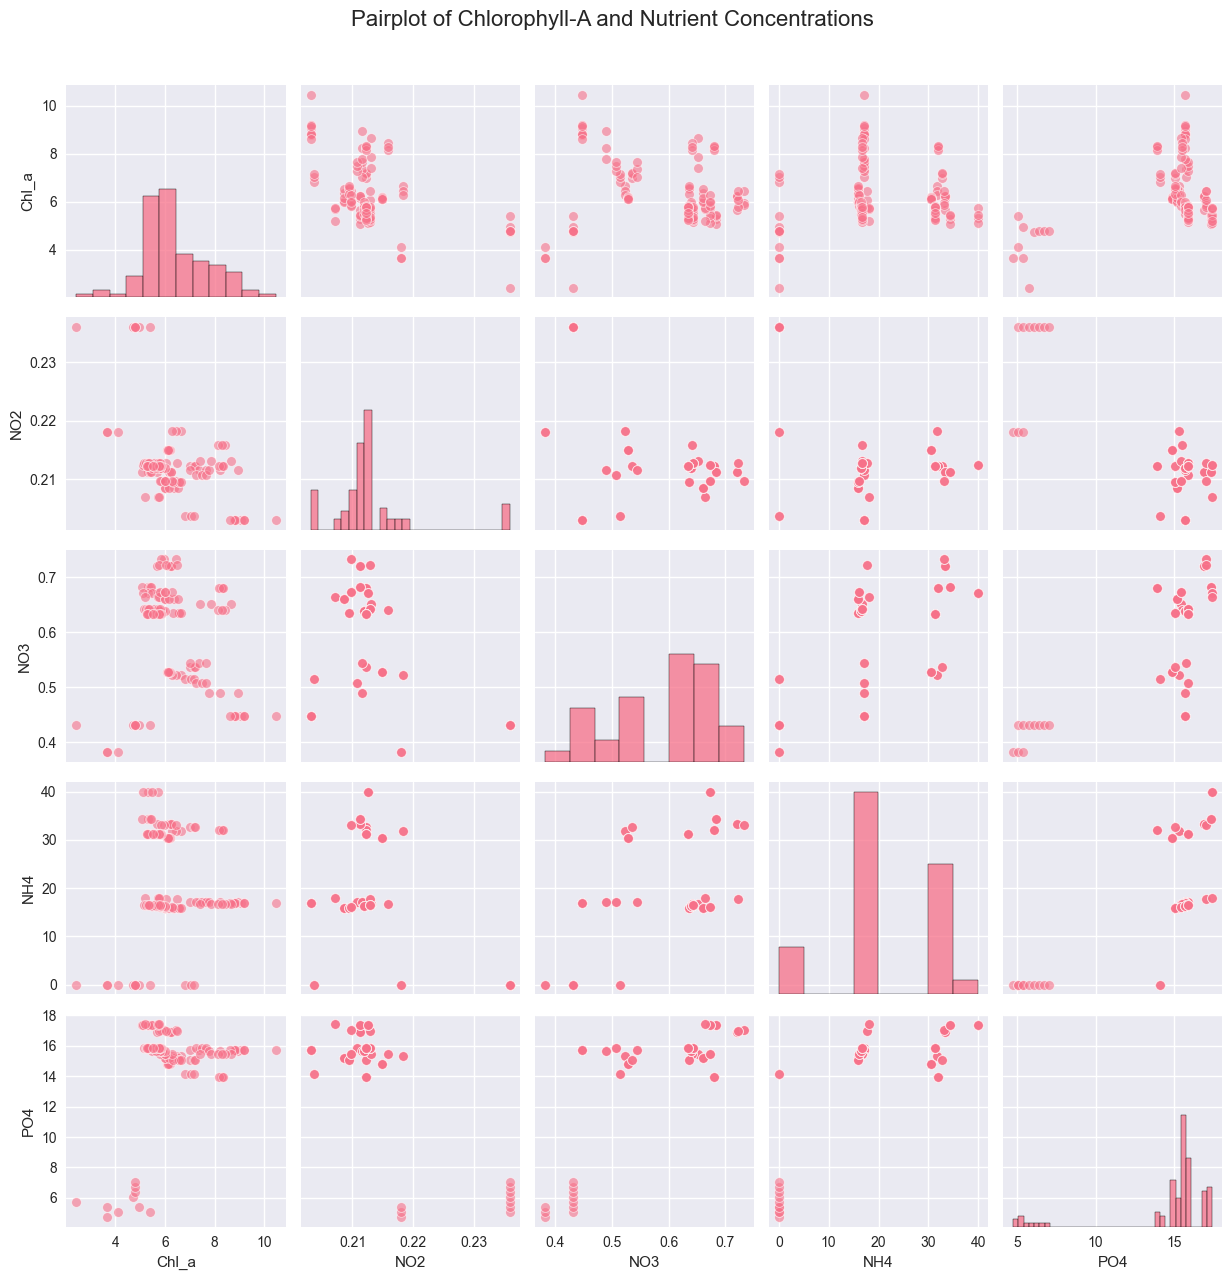

Correlation Matrix:
       Chl_a    NO2    NO3    NH4    PO4
Chl_a  1.000 -0.519 -0.123  0.090  0.372
NO2   -0.519  1.000 -0.324 -0.317 -0.758
NO3   -0.123 -0.324  1.000  0.537  0.656
NH4    0.090 -0.317  0.537  1.000  0.658
PO4    0.372 -0.758  0.656  0.658  1.000


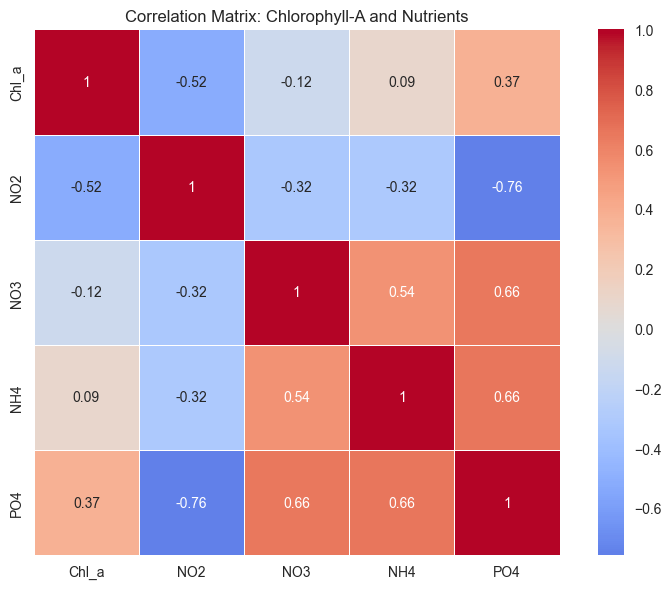

In [143]:
# Create pairplot for chlorophyll data
if 'chlor_clean' in locals():
    plt.figure(figsize=(12, 10))
    
    # Create pairplot of all relevant variables
    g = sns.pairplot(chlor_clean, 
                     diag_kind='hist',
                     plot_kws={'alpha': 0.6})
    
    # Add title
    g.fig.suptitle('Pairplot of Chlorophyll-A and Nutrient Concentrations', 
                   y=1.02, size=16)
    
    plt.tight_layout()
    plt.show()
    
    # Additional correlation analysis
    print("Correlation Matrix:")
    print(chlor_clean.corr().round(3))
    
    # Visualize correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(chlor_clean.corr(), annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix: Chlorophyll-A and Nutrients')
    plt.tight_layout()
    plt.show()
    
else:
    print("Clean dataset not available. Please run the previous cells first.")

## 2.IV Data Preparation for Regression

Prepare the data for training by splitting features and target, then creating train-test splits.

In [149]:
# Prompt: Prepare features and target for regression
if 'chlor_clean' in locals():
    # Extract features (nutrients) and target (Chl_a)
    X_chlor = chlor_clean.iloc[:, 1:].copy()  # Nutrient columns (NO2, NO3, NH4, PO4)
    y_chlor = chlor_clean.iloc[:, 0].copy()   # Chl_a column
    
    print("Feature matrix (X) - Nutrient concentrations:")
    print(f"Shape: {X_chlor.shape}")
    print(f"Columns: {X_chlor.columns.tolist()}")
    print("\nTarget vector (y) - Chlorophyll-A levels:")
    print(f"Shape: {y_chlor.shape}")
    print(f"Target range: {y_chlor.min():.3f} to {y_chlor.max():.3f}")
    print(f"Target mean: {y_chlor.mean():.3f} ± {y_chlor.std():.3f}")
    
else:
    print("Clean dataset not available. Please run the previous cells first.")

Feature matrix (X) - Nutrient concentrations:
Shape: (109, 4)
Columns: ['NO2', 'NO3', 'NH4', 'PO4']

Target vector (y) - Chlorophyll-A levels:
Shape: (109,)
Target range: 2.430 to 10.460
Target mean: 6.389 ± 1.348


<mark style="background-color: #fff000;">Problem 2. Item 2. Split the data into 70% training and 30% testing at random.</mark>

In [150]:
# Prompt: Split the data into training (70%) and testing (30%) sets
if 'X_chlor' in locals() and 'y_chlor' in locals():
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_chlor, y_chlor, 
        test_size=0.3, 
        random_state=42
    )
    
    print("Data split completed:")
    print(f"Training set size: {X_train_reg.shape[0]} samples ({70}%)")
    print(f"Testing set size: {X_test_reg.shape[0]} samples ({30}%)")
    
    print(f"\nTraining target statistics:")
    print(f"  Mean: {y_train_reg.mean():.3f}")
    print(f"  Std:  {y_train_reg.std():.3f}")
    print(f"  Range: {y_train_reg.min():.3f} to {y_train_reg.max():.3f}")
    
    print(f"\nTesting target statistics:")
    print(f"  Mean: {y_test_reg.mean():.3f}")
    print(f"  Std:  {y_test_reg.std():.3f}")
    print(f"  Range: {y_test_reg.min():.3f} to {y_test_reg.max():.3f}")
    
else:
    print("Features and target not available. Please run the previous cells first.")

Data split completed:
Training set size: 76 samples (70%)
Testing set size: 33 samples (30%)

Training target statistics:
  Mean: 6.393
  Std:  1.303
  Range: 3.680 to 10.460

Testing target statistics:
  Mean: 6.379
  Std:  1.466
  Range: 2.430 to 9.190


## 2.V Gaussian Process Regression Models


We'll build and test multiple Gaussian Process Regressor models with different kernels and hyperparameters.

<mark style="background-color: #fff000">Problem 2. Item 2. Make a pipeline using 
Standard Scaler and Gaussian Process Regressor. Train the model using the training set, then 
report the RMSE (root mean squared error) on the Test Set. You can fine-tune your own model 
by changing the kernel function, kernel parameter, and epsilon</mark>

Unlike in problem 1 where we start with original model. Here in problem 2, I decided to make several models with varying kernel function, kernel parameter, and epsilon. Then extract the best performing model to report the RMSE on test set.  

In [ ]:
# Initialize dictionary to store regression model results
regression_results = {}

# Prompt: "Create a helper function to evaluate regression models that trains the pipeline,
# makes predictions on both training and test sets, calculates RMSE, R², and MAE metrics,
# stores comprehensive results in a dictionary, and prints formatted performance metrics
# for comparing GPR and KRR models in chlorophyll prediction."

def print_regression_results(result):
    print(f"Training RMSE: {result['train_rmse']:.4f}")
    print(f"Testing RMSE:  {result['test_rmse']:.4f}")
    print(f"Training R²:   {result['train_r2']:.4f}")
    print(f"Testing R²:    {result['test_r2']:.4f}")
    print(f"Training MAE:  {result['train_mae']:.4f}")
    print(f"Testing MAE:   {result['test_mae']:.4f}")
    print("-" * 50)

def evaluate_regression_model(pipeline, model_name, X_train, X_test, y_train, y_test, print_results=True):
    """Helper function to train and evaluate a regression model"""
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'pipeline': pipeline
    }
    regression_results[model_name] = results

    if print_results:
        print(f"=== {model_name} ===")
        print_regression_results(results)
    
    return results

### 2.V.1 Baseline GPR with RBF Kernel
**Model:** Gaussian Process Regressor  
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** Default parameters  
**Description:** Baseline GPR model with RBF kernel for smooth predictions.

In [156]:
# Baseline GPR with RBF kernel
gpr_rbf_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(
        kernel=RBF(length_scale=1.0),
        random_state=42
    ))
])

if 'X_train_reg' in locals():
    gpr_rbf_baseline_result = evaluate_regression_model(gpr_rbf_baseline, "GPR - RBF Baseline", 
                            X_train_reg, X_test_reg, y_train_reg, y_test_reg)
else:
    print("Training data not available. Please run the data preparation cells first.")

=== GPR - RBF Baseline ===
Training RMSE: 0.2688
Testing RMSE:  1.1916
Training R²:   0.9569
Testing R²:    0.3191
Training MAE:  0.1808
Testing MAE:   0.5965
--------------------------------------------------


c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 0 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


### 2.V.2 GPR with Matern Kernel (ν=1.5)
**Model:** Gaussian Process Regressor  
**Kernel:** Matérn (ν=1.5)  
**Parameters:** length_scale=1.0, nu=1.5  
**Description:** Matérn kernel provides a good balance between smoothness and flexibility.

In [155]:
# GPR with Matern kernel (nu=1.5)
gpr_matern15 = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(
        kernel=Matern(length_scale=1.0, nu=1.5),
        random_state=42
    ))
])

gpr_matern15_result = evaluate_regression_model(gpr_matern15, "GPR - Matern (ν=1.5)", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== GPR - Matern (ν=1.5) ===
Training RMSE: 0.2688
Testing RMSE:  0.7926
Training R²:   0.9569
Testing R²:    0.6987
Training MAE:  0.1808
Testing MAE:   0.4403
--------------------------------------------------


### 2.V.3 GPR with RBF + White Noise Kernel
**Model:** Gaussian Process Regressor  
**Kernel:** RBF + WhiteKernel  
**Parameters:** RBF(length_scale=2.0) + WhiteKernel(noise_level=0.1)  
**Description:** RBF kernel with added white noise to handle measurement uncertainty.

In [158]:
# GPR with RBF + White Noise kernel
gpr_rbf_noise = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(
        kernel=RBF(length_scale=2.0) + WhiteKernel(noise_level=0.1),
        random_state=42
    ))
])

gpr_rbf_noise_result = evaluate_regression_model(gpr_rbf_noise, "GPR - RBF + White Noise", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== GPR - RBF + White Noise ===
Training RMSE: 1.0657
Testing RMSE:  1.0067
Training R²:   0.3226
Testing R²:    0.5140
Training MAE:  0.8266
Testing MAE:   0.7195
--------------------------------------------------


### 2.V.4 Best Performing GPR Model

In [161]:
# Find the GPR model with the lowest test RMSE
gpr_regression_results = {k: v for k, v in regression_results.items() if 'GPR' in k}

best_gpr_model = min(
    gpr_regression_results.items(),
    key=lambda x: x[1]['test_rmse']
)

# Extract the model name and results
best_gpr_name, best_gpr_results = best_gpr_model

# Print the results
print(f"Best GPR Model: {best_gpr_name}")
print(f"Test RMSE: {best_gpr_results['test_rmse']:.4f}")
print(f"Train RMSE: {best_gpr_results['train_rmse']:.4f}")
print(f"Test R²: {best_gpr_results['test_r2']:.4f}")
print(f"Train R²: {best_gpr_results['train_r2']:.4f}")
print(f"Test MAE: {best_gpr_results['test_mae']:.4f}")
print(f"Train MAE: {best_gpr_results['train_mae']:.4f}")

Best GPR Model: GPR - Matern (ν=1.5)
Test RMSE: 0.7926
Train RMSE: 0.2688
Test R²: 0.6987
Train R²: 0.9569
Test MAE: 0.4403
Train MAE: 0.1808


###  Best GPR model's RMSE (root mean squared error) on the Test Set

The best GPR model among the several models, is the GPR - Matern (v=1.5).

<mark style="background-color: #fff000;">Problem 2. Item 2. Report the RMSE (root mean squared error) on the Test Set.
</mark>


<mark style="background-color: #fff000;">Test RMSE: 0.7926
</mark>

## 2.VI Kernel Ridge Regression Models

Now let's build and test multiple Kernel Ridge Regression models with different kernels and hyperparameters.


<mark style="background-color: #fff000;">Problem 2. Item 3. Do the same as (b) but now using Standard Scaler + Kernel Ridge Regression (KRR). You can fine-tune your KRR by changing the kernel function, kernel parameter, and regularization (alpha).</mark>

### 2.VI.1 Baseline KRR with RBF Kernel
**Model:** Kernel Ridge Regression  
**Kernel:** RBF  
**Parameters:** alpha=1.0, gamma=None (default)  
**Description:** Baseline KRR model with RBF kernel and default regularization.

In [163]:

# Baseline KRR with RBF kernel
krr_rbf_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(
        kernel='rbf',
        alpha=1.0
    ))
])

krr_rbf_baseline_result = evaluate_regression_model(krr_rbf_baseline, "KRR - RBF Baseline", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== KRR - RBF Baseline ===
Training RMSE: 0.9753
Testing RMSE:  0.9966
Training R²:   0.4327
Testing R²:    0.5237
Training MAE:  0.7944
Testing MAE:   0.8291
--------------------------------------------------


### 2.VI.2 KRR with Linear Kernel
**Model:** Kernel Ridge Regression  
**Kernel:** Linear  
**Parameters:** alpha=0.1  
**Description:** Linear KRR for capturing linear relationships with low regularization.

In [164]:
# KRR with Linear kernel
krr_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(
        kernel='linear',
        alpha=0.1
    ))
])

krr_linear_result = evaluate_regression_model(krr_linear, "KRR - Linear", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== KRR - Linear ===
Training RMSE: 6.4806
Testing RMSE:  6.3872
Training R²:   -24.0482
Testing R²:    -18.5647
Training MAE:  6.3925
Testing MAE:   6.3067
--------------------------------------------------


### 2.VI.3 KRR with Polynomial Kernel
**Model:** Kernel Ridge Regression  
**Kernel:** Polynomial  
**Parameters:** degree=3, alpha=0.5, gamma=0.1  
**Description:** Polynomial KRR for capturing non-linear polynomial relationships.

In [165]:
# KRR with Polynomial kernel
krr_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(
        kernel='poly',
        degree=3,
        alpha=0.5,
        gamma=0.1
    ))
])

krr_poly_result = evaluate_regression_model(krr_poly, "KRR - Polynomial (degree=3)", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== KRR - Polynomial (degree=3) ===
Training RMSE: 0.6650
Testing RMSE:  0.6833
Training R²:   0.7363
Testing R²:    0.7761
Training MAE:  0.4851
Testing MAE:   0.4983
--------------------------------------------------


### 2.VI.3 Best KRR Model 

In [167]:
# Find the KRR model with the lowest test RMSE
krr_regression_results = {k: v for k, v in regression_results.items() if 'KRR' in k}

best_krr_model = min(
    krr_regression_results.items(),
    key=lambda x: x[1]['test_rmse']
)

# Extract the model name and results
best_krr_name, best_krr_results = best_krr_model

# Print the results
print(f"Best KRR Model: {best_krr_name}")
print(f"Test RMSE: {best_krr_results['test_rmse']:.4f}")
print(f"Train RMSE: {best_krr_results['train_rmse']:.4f}")
print(f"Test R²: {best_krr_results['test_r2']:.4f}")
print(f"Train R²: {best_krr_results['train_r2']:.4f}")
print(f"Test MAE: {best_krr_results['test_mae']:.4f}")
print(f"Train MAE: {best_krr_results['train_mae']:.4f}")

Best KRR Model: KRR - Polynomial (degree=3)
Test RMSE: 0.6833
Train RMSE: 0.6650
Test R²: 0.7761
Train R²: 0.7363
Test MAE: 0.4983
Train MAE: 0.4851


###  Best KRR model's RMSE (root mean squared error) on the Test Set


The best KRR model among the several models, is the KRR - Polynomial (degree=3).

<mark style="background-color: #fff000;">Problem 2. Item 3. Report the RMSE (root mean squared error) on the Test Set.
</mark>


<mark style="background-color: #fff000;">Test RMSE: 0.6833
</mark>

## 2.VII Model Comparison and Analysis


Let's compare all the regression models and identify the best performing ones.


In [169]:
# Prompt: Create comprehensive comparison of all regression models
if regression_results:
    # Create comparison table
    comparison_data_reg = []
    for model_name, results in regression_results.items():
        comparison_data_reg.append({
            'Model': model_name,
            'Train RMSE': f"{results['train_rmse']:.4f}",
            'Test RMSE': f"{results['test_rmse']:.4f}",
            'Train R²': f"{results['train_r2']:.4f}",
            'Test R²': f"{results['test_r2']:.4f}",
            'Test MAE': f"{results['test_mae']:.4f}",
            'RMSE Gap': f"{results['test_rmse'] - results['train_rmse']:.4f}"
        })
    
    comparison_df_reg = pd.DataFrame(comparison_data_reg)
    print("=== REGRESSION MODEL COMPARISON TABLE ===")
    print(comparison_df_reg.to_string(index=False))
    
    # Find best models by different metrics
    best_test_rmse = min(regression_results.items(), key=lambda x: x[1]['test_rmse'])
    best_test_r2 = max(regression_results.items(), key=lambda x: x[1]['test_r2'])
    
    print(f"\n=== BEST PERFORMERS ===")
    print(f"Best Test RMSE: {best_test_rmse[0]} (RMSE: {best_test_rmse[1]['test_rmse']:.4f})")
    print(f"Best Test R²:   {best_test_r2[0]} (R²: {best_test_r2[1]['test_r2']:.4f})")
    
    # Separate GPR and KRR models for comparison
    gpr_models = {k: v for k, v in regression_results.items() if 'GPR' in k}
    krr_models = {k: v for k, v in regression_results.items() if 'KRR' in k}
    
    if gpr_models:
        best_gpr = min(gpr_models.items(), key=lambda x: x[1]['test_rmse'])
        print(f"\nBest GPR Model: {best_gpr[0]}")
        print(f"  Test RMSE: {best_gpr[1]['test_rmse']:.4f}")
        print(f"  Test R²:   {best_gpr[1]['test_r2']:.4f}")
    
    if krr_models:
        best_krr = min(krr_models.items(), key=lambda x: x[1]['test_rmse'])
        print(f"\nBest KRR Model: {best_krr[0]}")
        print(f"  Test RMSE: {best_krr[1]['test_rmse']:.4f}")
        print(f"  Test R²:   {best_krr[1]['test_r2']:.4f}")
    
    # Model comparison analysis
    if gpr_models and krr_models:
        print(f"\n=== GPR vs KRR COMPARISON ===")
        gpr_rmse = best_gpr[1]['test_rmse']
        krr_rmse = best_krr[1]['test_rmse']
        
        if gpr_rmse < krr_rmse:
            improvement = ((krr_rmse - gpr_rmse) / krr_rmse) * 100
            print(f"GPR outperforms KRR by {improvement:.2f}% in RMSE")
            print(f"Winner: {best_gpr[0]}")
        else:
            improvement = ((gpr_rmse - krr_rmse) / gpr_rmse) * 100
            print(f"KRR outperforms GPR by {improvement:.2f}% in RMSE") 
            print(f"Winner: {best_krr[0]}")
    
else:
    print("No regression results available. Please run the model training cells first.")

=== REGRESSION MODEL COMPARISON TABLE ===
                      Model Train RMSE Test RMSE Train R²  Test R² Test MAE RMSE Gap
         GPR - RBF Baseline     0.2688    1.1916   0.9569   0.3191   0.5965   0.9228
       GPR - Matern (ν=1.5)     0.2688    0.7926   0.9569   0.6987   0.4403   0.5237
    GPR - RBF + White Noise     1.0657    1.0067   0.3226   0.5140   0.7195  -0.0590
         KRR - RBF Baseline     0.9753    0.9966   0.4327   0.5237   0.8291   0.0213
               KRR - Linear     6.4806    6.3872 -24.0482 -18.5647   6.3067  -0.0934
KRR - Polynomial (degree=3)     0.6650    0.6833   0.7363   0.7761   0.4983   0.0183

=== BEST PERFORMERS ===
Best Test RMSE: KRR - Polynomial (degree=3) (RMSE: 0.6833)
Best Test R²:   KRR - Polynomial (degree=3) (R²: 0.7761)

Best GPR Model: GPR - Matern (ν=1.5)
  Test RMSE: 0.7926
  Test R²:   0.6987

Best KRR Model: KRR - Polynomial (degree=3)
  Test RMSE: 0.6833
  Test R²:   0.7761

=== GPR vs KRR COMPARISON ===
KRR outperforms GPR by 13.79

## 2.VII Accuracy Plot


<mark style="background-color: #fff000;">
Problem 2. Item 3. Compare the results of GPR versus KRR in terms of accuracy. 
</mark>

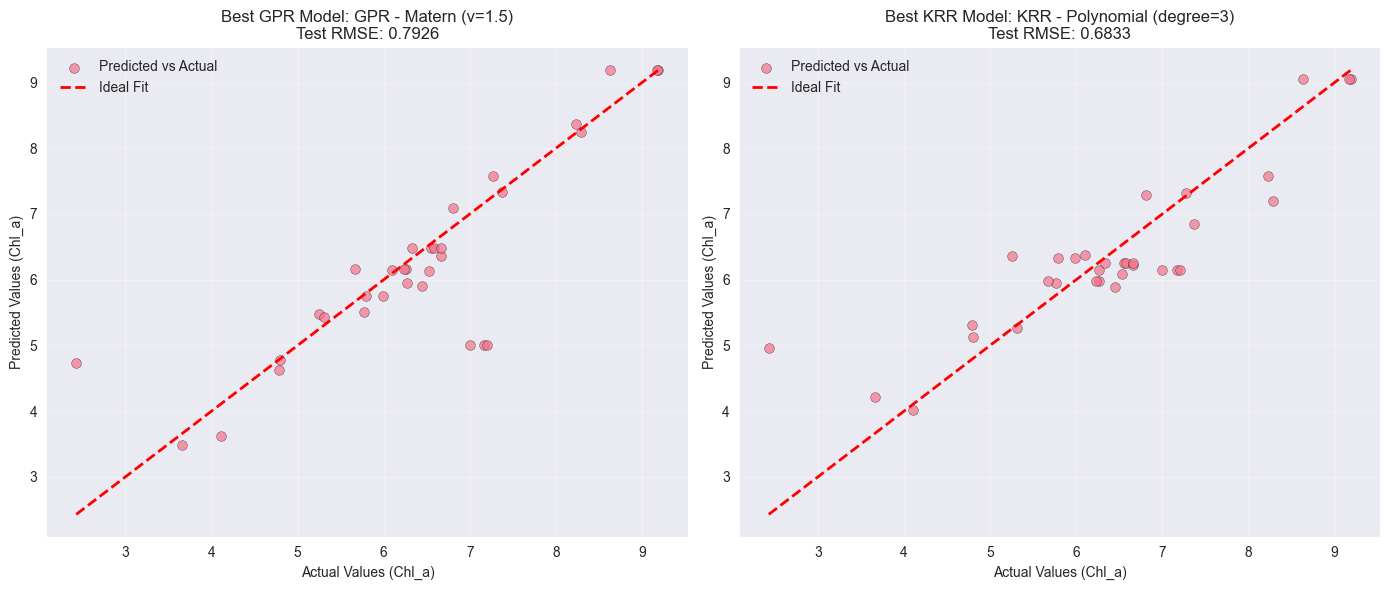

Actual vs Predicted Values:
- Left: Best GPR Model
- Right: Best KRR Model


In [178]:
# Prompt: Plot the actual vs predicted values for the best KRR model and best GPR model
plt.figure(figsize=(14, 6))

# Best GPR model
plt.subplot(1, 2, 1)
y_test_pred_gpr = best_gpr_results['pipeline'].predict(X_test_reg)
plt.scatter(y_test_reg, y_test_pred_gpr, alpha=0.7, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Ideal Fit')
plt.title(f"Best GPR Model: {best_gpr_name}\nTest RMSE: {best_gpr_results['test_rmse']:.4f}", fontsize=12)
plt.xlabel("Actual Values (Chl_a)", fontsize=10)
plt.ylabel("Predicted Values (Chl_a)", fontsize=10)
plt.legend()
plt.grid(alpha=0.3)

# Best KRR model
plt.subplot(1, 2, 2)
y_test_pred_krr = best_krr_results['pipeline'].predict(X_test_reg)
plt.scatter(y_test_reg, y_test_pred_krr, alpha=0.7, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Ideal Fit')
plt.title(f"Best KRR Model: {best_krr_name}\nTest RMSE: {best_krr_results['test_rmse']:.4f}", fontsize=12)
plt.xlabel("Actual Values (Chl_a)", fontsize=10)
plt.ylabel("Predicted Values (Chl_a)", fontsize=10)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Actual vs Predicted Values:")
print("- Left: Best GPR Model")
print("- Right: Best KRR Model")

## 2.IX Summary and Conclusions

This problem set successfully implemented regression models for predicting Chlorophyll-A levels in Laguna Lake using nutrient concentrations.

### Key Results:
- **Task:** Predict Chl_a levels from nutrient concentrations (NO2, NO3, NH4, PO4)
- **Data Split:** 70% training, 30% testing
- **Models Tested:** Gaussian Process Regression (GPR) and Kernel Ridge Regression (KRR)
- **Evaluation Metric:** Root Mean Square Error (RMSE) on test set


### Best Model Performance:
Among the GPR and KRR models, the model with the lowest RMSE is the Polynomial (degree=3) (RMSE = 0.6833)
